<a href="https://colab.research.google.com/github/sailakshmi-0927/sailakshmi-0927/blob/main/AIML_Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/sample_submission.csv')

In [ ]:
df=pd.read_csv('/content/train_solution_bounding_boxes (1).csv')

In [ ]:
df.head(10)

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
5,vid_4_10100.jpg,447.568741,160.625804,582.083936,232.517696
6,vid_4_10120.jpg,168.755427,180.677284,304.738061,246.700450
7,vid_4_10140.jpg,0.000000,188.991313,85.111433,249.145753
8,vid_4_1020.jpg,202.506512,189.480373,239.192475,229.094273
9,vid_4_1040.jpg,116.416787,189.969434,180.494935,229.094273


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   559 non-null    object 
 1   xmin    559 non-null    float64
 2   ymin    559 non-null    float64
 3   xmax    559 non-null    float64
 4   ymax    559 non-null    float64
dtypes: float64(4), object(1)
memory usage: 22.0+ KB


In [ ]:
print(df.shape)
print(df.describe())

(559, 5)
             xmin        ymin        xmax        ymax
count  559.000000  559.000000  559.000000  559.000000
mean   263.387486  186.517539  365.324845  231.500472
std    207.368388    9.315974  213.501175   13.987176
min      0.000000  148.399292   28.556446  198.321729
25%     61.387844  180.109294  166.309696  223.225547
50%    236.746744  187.524131  348.585579  230.561454
75%    446.835022  193.881918  571.322721  237.897362
max    645.183792  208.064672  676.000000  308.322072


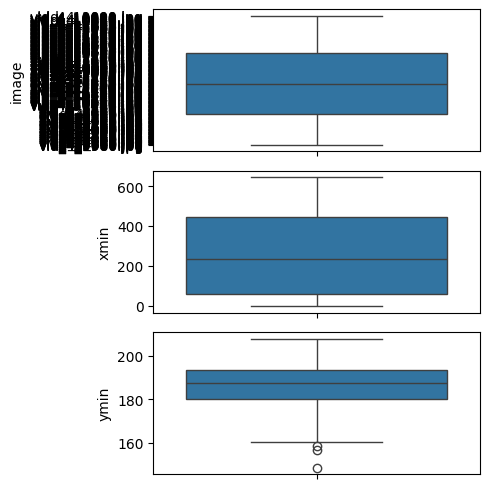

In [ ]:
fig, axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['image'],ax=axs[0])
plt2=sns.boxplot(df['xmin'],ax=axs[1])
plt3=sns.boxplot(df['ymin'],ax=axs[2])
plt.tight_layout()

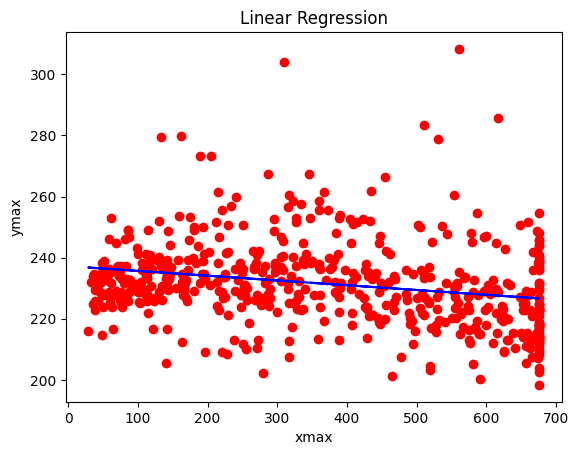

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
xmax = df['xmax']
ymax = df['ymax']
xmin = df['xmin']

lm = LinearRegression()
lm.fit(xmax.values.reshape(-1, 1), ymax)

y_pred = lm.predict(xmin.values.reshape(-1, 1))

plt.scatter(xmax, ymax, color='red')
plt.plot(xmax, lm.predict(xmax.values.reshape(-1, 1)), color='blue')
plt.title('Linear Regression')
plt.xlabel('xmax')
plt.ylabel('ymax')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


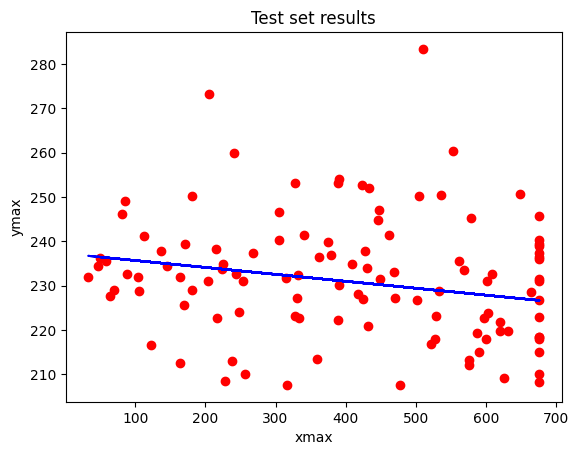

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'xmax' is your feature and 'ymax' is your target variable
# Replace 'xmax' and 'ymax' with your actual feature and target variables
x = df[['xmax']]  # Use double brackets to create a DataFrame for the feature
y = df['ymax']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Now you can use x_test and y_test in your plotting code
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, lm.predict(x_test), color='blue')
plt.title('Test set results')
plt.xlabel('xmax')  # Update x-axis label if needed
plt.ylabel('ymax')  # Update y-axis label if needed
plt.show()

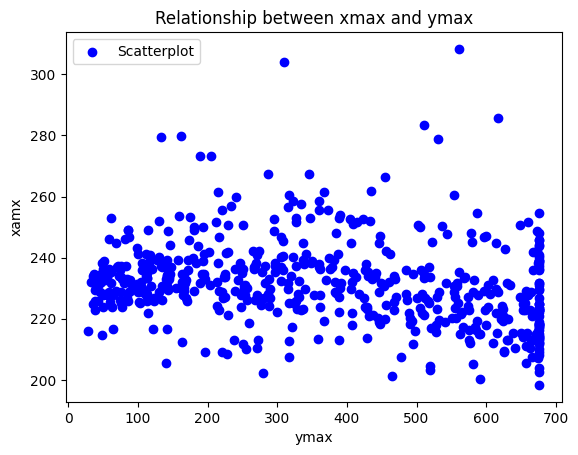

In [ ]:
plt.scatter(x,y,color='blue',label='Scatterplot')
plt.title('Relationship between xmax and ymax')
plt.xlabel('ymax')
plt.ylabel('xamx')
plt.legend()
plt.show()

In [ ]:
slope=lm.coef_
intercept=lm.intercept_,
print("Estimated model slope:",slope)
print("Estimated model intercept:",intercept)

Estimated model slope: [-0.01562537]
Estimated model intercept: (237.2088061739554,)


In [ ]:
x_new=[[200]]
lm.predict(x_new)
x_new=[[57.5]]
lm.predict(x_new)

array([236.31034762])

In [ ]:
df.iloc[0:5,0:7]

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [ ]:
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor
clf = DecisionTreeRegressor(criterion='squared_error', max_depth=3) # Change to DecisionTreeRegressor
# Reshape xmax to a 2D array using .values.reshape(-1, 1)
clf.fit(xmax.values.reshape(-1, 1), ymax)

DecisionTreeRegressor(max_depth=3)

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df.isnull().sum()

,0
image,0
xmin,0
ymin,0
xmax,0
ymax,0


<Axes: ylabel='count'>

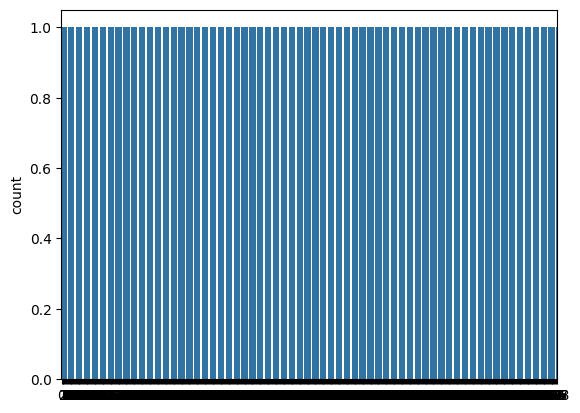

In [ ]:
sns.countplot(df['xmax'])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor

knn = KNeighborsRegressor()  # Create a KNeighborsRegressor object for regression tasks

# Reshape xmax to a 2D array using .values.reshape(-1, 1)
knn.fit(xmax.values.reshape(-1, 1), ymax) # Fit the model with your data

KNeighborsRegressor()

In [ ]:
array = df.values
x = array[:, 0:5]

num_features = df.shape[1] - 1
x = array[:, 0:num_features]

y = array[:, -1]

In [ ]:
array = df.values
x = array[:, 0:5]  # or x = array[:, :-1] to select all columns except the last one
y = array[:, -1]

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Print the data types of xmax and ymax
print(xmax.dtype, ymax.dtype)
print(xmax.unique(), ymax.unique()) # Check the unique values to see if they are discrete classes

# If either xmax or ymax has a continuous data type (e.g., float64),
# you need to convert it to discrete classes if it represents classification labels.

float64 float64
[327.7279305  120.3299566  361.9681621  630.0202605  132.5586107
 582.0839363  304.7380608   85.11143271 239.1924747  180.4949349
 602.1389291  268.5412446   36.68596237 112.5036179  676.
 518.0057887  265.6063676   75.81765557 633.9334298  405.9913169
 186.853835   615.8350217  429.959479   238.7033285   74.35021708
 624.6396527  516.0492041  383.0014472  256.8017366  145.7655572
  50.38205499 521.4298119  650.5643994  591.3777135  428.4920405
 317.4558611  641.7597685  203.9739508  581.105644    90.49204052
 518.984081   614.3675832  465.1780029  518.4949349  447.0795948
 388.382055   667.6845152  321.3690304  502.3531114  271.9652677
 221.0940666  327.2387844  554.2026049  586.975398   180.0057887
 225.0072359  404.5238784   60.65412446 116.9059334  240.170767
 114.9493488  173.6468886  105.1664255  309.6295224  477.406657
 434.8509407  359.0332851  130.1128799  316.9667149  279.3024602
 388.8712012  620.2373372   81.68740955 255.8234443  374.1968162
 544.4196816  18

In [ ]:
leaf_size = list(range(1,15))
n_neighbors = list(range(1,10))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer  # Import for discretization

# Assuming 'df' is your DataFrame and 'x' and 'y' are your features and target

# 1. Identify columns with string values:
string_cols = df.select_dtypes(include=['object']).columns

# 2. Create a LabelEncoder object:
encoder = LabelEncoder()

# 3. **Keep 'x' as a DataFrame for column access:**
x = df[df.columns[:-1]]  # Selects all columns except the last one as features

# 4. Encode string columns in 'x' using LabelEncoder:
for col in string_cols:
    if col in x.columns:  # Now you can safely check columns
        x[col] = encoder.fit_transform(x[col])

# Convert 'x' to a NumPy array after encoding:
x = x.values

# --- Discretize the target variable 'y' ---
# Create a KBinsDiscretizer object to discretize 'y' into bins
# You can adjust the number of bins (n_bins) and strategy (e.g., 'uniform', 'quantile')
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Fit and transform 'y' to create discrete labels
y_discretized = discretizer.fit_transform(y.reshape(-1, 1))  # Reshape y for the discretizer
y_discretized = y_discretized.ravel()  # Flatten the array back to 1D

# 5. Now you can fit your model using the discretized target:
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10, scoring='roc_auc')
best_model = clf.fit(x, y_discretized)  # Use y_discretized for fitting

Streaming output truncated to the last 5000 lines.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 633, in roc_auc_score
    raise ValueError("multi_class must be in ('ovo', 'ovr')")
ValueError: multi_class must be in ('ovo', 'ovr')

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign *

In [40]:
 print('Best leaf_size:',best_model.best_estimator_.get_params()['leaf_size'])
 print('Best p:',best_model.best_estimator_.get_params()['p'])
 print('Best n_neighbors:',best_model.best_estimator_.get_params()['n_neighbors'])
 print('Best Score:',best_model.best_score_)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1
Best Score: nan
